In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
import pickle


---------------------------------------------------------------------------

In [6]:
loan_df=pd.read_csv("loan_data_set.csv")

In [7]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
missing_val_count_by_column = (loan_df.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Gender              13
Married              3
Dependents          15
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64


In [10]:
len(loan_df)

614

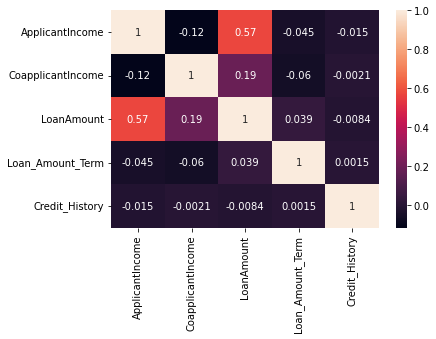

In [11]:
ax = sns.heatmap(loan_df.corr(), annot=True)

-----------------------------------------------------------

In [12]:
mode_credit_history = loan_df['Credit_History'].mode()[0]
loan_df['Credit_History'].fillna(mode_credit_history,inplace=True)
loan_df['Credit_History'] = loan_df['Credit_History'].apply(lambda x: int(x) if pd.notnull(x) else x)

In [13]:
mode_Loan_Amount_Term = loan_df['Loan_Amount_Term'].mode()[0]
loan_df['Loan_Amount_Term'].fillna(mode_Loan_Amount_Term,inplace=True)
loan_df['Loan_Amount_Term'] = loan_df['Loan_Amount_Term'].apply(lambda x: int(x) if pd.notnull(x) else x)

In [14]:
mean_LoanAmount = loan_df['LoanAmount'].mean()
loan_df['LoanAmount'].fillna(mean_LoanAmount,inplace=True)

--------------------------------------

In [15]:
df=loan_df.copy()

In [16]:
missing_val_count_by_column = (df.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Gender           13
Married           3
Dependents       15
Self_Employed    32
dtype: int64


In [17]:
cleaned_loan_df = df.dropna()    #with dropping rows

In [18]:
missing_val_count_by_column = (cleaned_loan_df.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Series([], dtype: int64)


In [19]:
#without droppig rows
loan_df['Gender'].fillna(loan_df['Gender'].mode()[0],inplace=True)
loan_df['Married'].fillna(loan_df['Married'].mode()[0],inplace=True)
loan_df['Dependents'].fillna(loan_df['Dependents'].mode()[0],inplace=True)
loan_df['Self_Employed'].fillna(loan_df['Self_Employed'].mode()[0],inplace=True)

In [20]:
len(cleaned_loan_df)

554

In [21]:
len(loan_df)

614

----------------------------------------

In [22]:
Table1 = cleaned_loan_df.groupby(['Gender', 'Loan_Status']).size().reset_index(name='Count')
Table1

,Gender,Loan_Status,Count
0,Female,N,34
1,Female,Y,67
2,Male,N,138
3,Male,Y,315


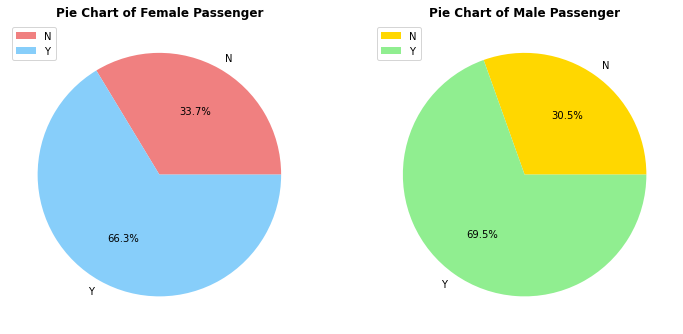

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

female_colors = ['lightcoral', 'lightskyblue'] 
male_colors = ['gold', 'lightgreen']

y_female = Table1[Table1['Gender']=='Female']['Count']
mylabels_female = Table1[Table1['Gender']=='Female']['Loan_Status']

y_male = Table1[Table1['Gender']=='Male']['Count']
mylabels_male = Table1[Table1['Gender']=='Male']['Loan_Status']

axes[0].pie(y_female, labels = mylabels_female,autopct='%1.1f%%',colors=female_colors)
axes[0].legend()
axes[0].set_title("Pie Chart of Female Passenger",fontweight='bold')

axes[1].pie(y_male, labels = mylabels_male,autopct='%1.1f%%',colors=male_colors)
axes[1].legend()
axes[1].set_title("Pie Chart of Male Passenger",fontweight='bold')

plt.show() 

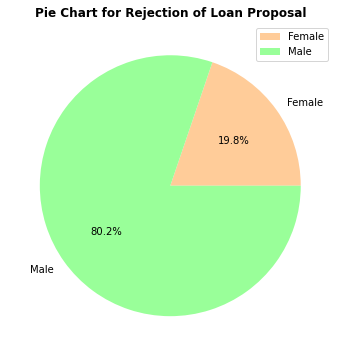

In [24]:
fig, axes = plt.subplots(1, 1, figsize=(12, 6))

rejected_data = Table1[Table1['Loan_Status'] == 'N']

rejected_colors = ['#FFCC99', '#99FF99']  

axes.pie(rejected_data['Count'], labels=rejected_data['Gender'], autopct='%1.1f%%', colors=rejected_colors)
axes.legend()
axes.set_title("Pie Chart for Rejection of Loan Proposal", fontweight='bold')

plt.show()

In [25]:
Table2 = cleaned_loan_df.groupby(['Married', 'Loan_Status']).size().reset_index(name='Count')
Table2

,Married,Loan_Status,Count
0,No,N,72
1,No,Y,120
2,Yes,N,100
3,Yes,Y,262


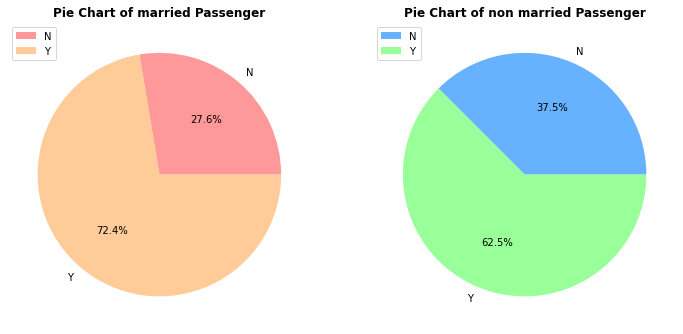

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

marriedyes_colors = ['#FF9999', '#FFCC99'] 
marriedno_colors = ['#66B2FF', '#99FF99'] 

y_marriedyes = Table2[Table2['Married']=='Yes']['Count']
mylabels_marriedyes = Table2[Table2['Married']=='Yes']['Loan_Status']

y_marriedno = Table2[Table2['Married']=='No']['Count']
mylabels_marriedno = Table2[Table2['Married']=='No']['Loan_Status']

axes[0].pie(y_marriedyes, labels = mylabels_marriedyes,autopct='%1.1f%%',colors=marriedyes_colors)
axes[0].legend()
axes[0].set_title("Pie Chart of married Passenger",fontweight='bold')

axes[1].pie(y_marriedno, labels = mylabels_marriedno,autopct='%1.1f%%',colors=marriedno_colors)
axes[1].legend()
axes[1].set_title("Pie Chart of non married Passenger",fontweight='bold')

plt.show() 

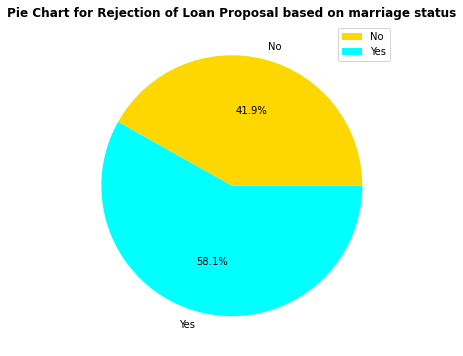

In [27]:
fig, axes = plt.subplots(1, 1, figsize=(12, 6))

Marriagerejected_data = Table2[Table2['Loan_Status'] == 'N']

Marriagerejected_colors = ['gold', 'cyan']  

axes.pie(Marriagerejected_data['Count'], labels=Marriagerejected_data['Married'], autopct='%1.1f%%', colors=Marriagerejected_colors)
axes.legend()
axes.set_title("Pie Chart for Rejection of Loan Proposal based on marriage status", fontweight='bold')

plt.show()

In [28]:
Table3 = cleaned_loan_df.groupby(['Dependents', 'Loan_Status']).size().reset_index(name='Count')
Table3

,Dependents,Loan_Status,Count
0,0,N,99
1,0,Y,220
2,1,N,34
3,1,Y,61
4,2,N,22
5,2,Y,72
6,3+,N,17
7,3+,Y,29


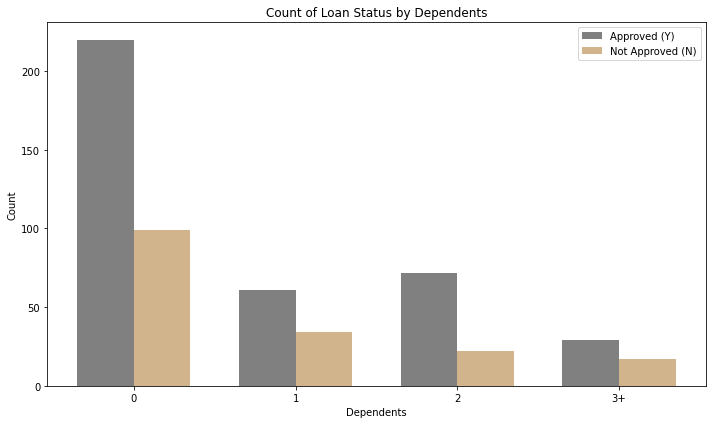

In [29]:
dependents = Table3['Dependents'].unique()
dependents.sort()  

count_Y = Table3[Table3['Loan_Status'] == 'Y']['Count'].tolist()
count_N = Table3[Table3['Loan_Status'] == 'N']['Count'].tolist()

bar_width = 0.35
index = np.arange(len(dependents))

plt.figure(figsize=(10, 6))  
bars1 = plt.bar(index, count_Y, bar_width, label='Approved (Y)', color='gray')  
bars2 = plt.bar(index + bar_width, count_N, bar_width, label='Not Approved (N)', color='tan')  

plt.xlabel('Dependents')
plt.ylabel('Count')
plt.title('Count of Loan Status by Dependents')
plt.xticks(index + bar_width / 2, dependents)
plt.legend()


plt.tight_layout()
plt.show()

In [30]:
Table4 = cleaned_loan_df.groupby(['Credit_History', 'Loan_Status']).size().reset_index(name='Count')
Table4

,Credit_History,Loan_Status,Count
0,0,N,73
1,0,Y,7
2,1,N,99
3,1,Y,375


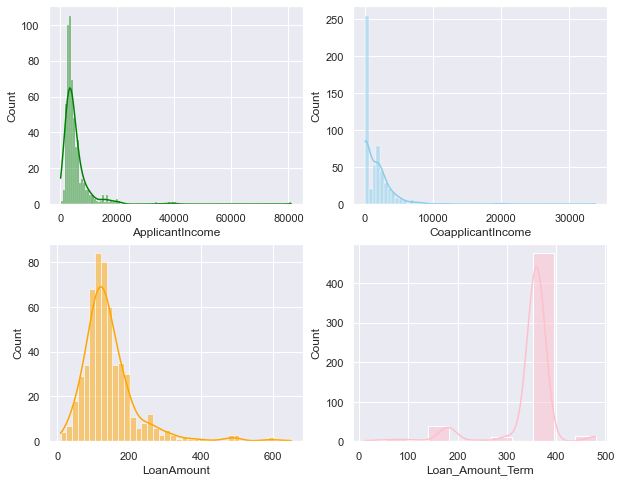

In [31]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=cleaned_loan_df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=cleaned_loan_df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=cleaned_loan_df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');
sns.histplot(data=cleaned_loan_df, x="Loan_Amount_Term", kde=True, ax=axs[1, 1], color='pink');

***we have already set limits:***

ApplicantIncome: 0,10000 

CoapplicantIncome: 0,10000

LoanAmount: 9.0,700.0

Loan_Amount_Term:12.0,360.0


In [32]:
df['ApplicantIncome']=(df['ApplicantIncome']-0)/(100000-0)
df['CoapplicantIncome']=(df['CoapplicantIncome']-0)/(100000-0)
df['LoanAmount']=(df['LoanAmount']-9)/(700-9)
df['Loan_Amount_Term']=(df['Loan_Amount_Term']-12)/(540-12)

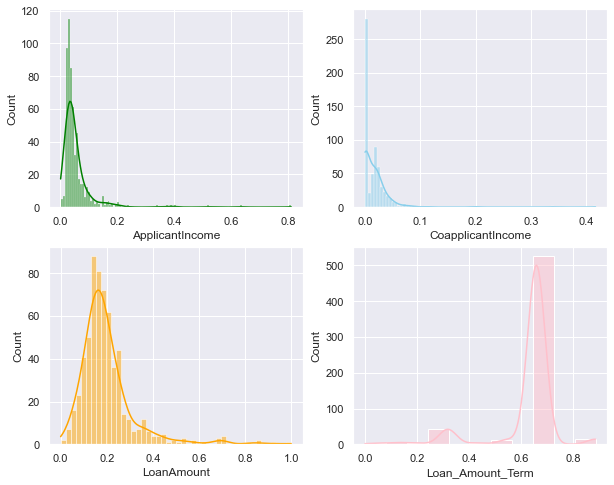

In [33]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');
sns.histplot(data=df, x="Loan_Amount_Term", kde=True, ax=axs[1, 1], color='pink');

In [34]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,0.05849,0.00000,0.198860,0.659091,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,0.04583,0.01508,0.172214,0.659091,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,0.03000,0.00000,0.082489,0.659091,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,0.02583,0.02358,0.160637,0.659091,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,0.06000,0.00000,0.191027,0.659091,1,Urban,Y


In [35]:
len(df)

614

----------------------------

In [36]:
df_loan = df.drop(['Loan_ID'], axis = 1)

In [37]:
df_loan

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,0.05849,0.00000,0.198860,0.659091,1,Urban,Y
1,Male,Yes,1,Graduate,No,0.04583,0.01508,0.172214,0.659091,1,Rural,N
2,Male,Yes,0,Graduate,Yes,0.03000,0.00000,0.082489,0.659091,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,0.02583,0.02358,0.160637,0.659091,1,Urban,Y
4,Male,No,0,Graduate,No,0.06000,0.00000,0.191027,0.659091,1,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,0.02900,0.00000,0.089725,0.659091,1,Rural,Y
610,Male,Yes,3+,Graduate,No,0.04106,0.00000,0.044863,0.318182,1,Rural,Y
611,Male,Yes,1,Graduate,No,0.08072,0.00240,0.353111,0.659091,1,Urban,Y
612,Male,Yes,2,Graduate,No,0.07583,0.00000,0.257598,0.659091,1,Urban,Y


In [38]:
cat_columns_to_encode = [col for col in df_loan.select_dtypes(include=['object']).columns 
                         if col not in ['Dependents', 'Property_Area']]
cat_columns_to_encode

['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Status']

In [39]:
label_encoder = LabelEncoder()

# Loop through each column and encode values from 1 to 3
for column in cat_columns_to_encode:
    encoded_values = label_encoder.fit_transform(df_loan[column]) 
    df_loan[column] = encoded_values

In [40]:
df_loan

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.05849,0.00000,0.198860,0.659091,1,Urban,1
1,1,1,1,0,0,0.04583,0.01508,0.172214,0.659091,1,Rural,0
2,1,1,0,0,1,0.03000,0.00000,0.082489,0.659091,1,Urban,1
3,1,1,0,1,0,0.02583,0.02358,0.160637,0.659091,1,Urban,1
4,1,0,0,0,0,0.06000,0.00000,0.191027,0.659091,1,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0.02900,0.00000,0.089725,0.659091,1,Rural,1
610,1,1,3+,0,0,0.04106,0.00000,0.044863,0.318182,1,Rural,1
611,1,1,1,0,0,0.08072,0.00240,0.353111,0.659091,1,Urban,1
612,1,1,2,0,0,0.07583,0.00000,0.257598,0.659091,1,Urban,1


In [41]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    int64  
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(5), int64(1), object(2)
memory usage: 45.7+ KB


In [42]:
categorical_columns = df_loan.select_dtypes(include=['object']).columns
encoded_df = pd.get_dummies(df_loan, columns=categorical_columns)

---------------------------------------------

In [43]:
Final_Loan_df=encoded_df.copy()

In [44]:
Final_Loan_df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0.05849,0.00000,0.198860,0.659091,1,1,1,0,0,0,0,0,1
1,1,1,0,0,0.04583,0.01508,0.172214,0.659091,1,0,0,1,0,0,1,0,0
2,1,1,0,1,0.03000,0.00000,0.082489,0.659091,1,1,1,0,0,0,0,0,1
3,1,1,1,0,0.02583,0.02358,0.160637,0.659091,1,1,1,0,0,0,0,0,1
4,1,0,0,0,0.06000,0.00000,0.191027,0.659091,1,1,1,0,0,0,0,0,1


In [45]:
feature_list=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History',
                'Gender',
                'Married',
                'Dependents_0',
                'Dependents_1',
                'Dependents_2',
                'Dependents_3+',
                'Education',
                'Self_Employed',
                'Property_Area_Rural',
                'Property_Area_Urban',
                'Property_Area_Semiurban','Loan_Status'] 

Final_Loan_df=Final_Loan_df[feature_list]

array([[0.05849   , 0.        , 0.19885986, ..., 0.        , 1.        ,
        0.        ],
       [0.04583   , 0.01508   , 0.17221418, ..., 1.        , 0.        ,
        0.        ],
       [0.03      , 0.        , 0.08248915, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.08072   , 0.0024    , 0.35311143, ..., 0.        , 1.        ,
        0.        ],
       [0.07583   , 0.        , 0.25759768, ..., 0.        , 1.        ,
        0.        ],
       [0.04583   , 0.        , 0.17945007, ..., 0.        , 0.        ,
        1.        ]])

In [55]:
y = Final_Loan_df.Loan_Status

loan_predictors = Final_Loan_df.drop(['Loan_Status'], axis=1)
X = loan_predictors.select_dtypes(exclude=['object'])

X_train, X_valid, y_train, y_valid = train_test_split(X.values, y.values, train_size=0.8, test_size=0.2,
                                                      random_state=0)

In [56]:
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    print(preds)
    return mean_absolute_error(y_valid, preds)

In [57]:
print(score_dataset(X_train,X_valid, y_train, y_valid))

[1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1]
0.17073170731707318


In [58]:
#perform cross validation:
model = LogisticRegression()

k = 5
cv_scores = cross_val_score(model, X, y, cv=k)

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean()*100:.2f}")

Cross-validation scores: [0.81300813 0.7804878  0.7804878  0.85365854 0.81967213]
Mean accuracy: 80.95


-------------------------------------

In [59]:
#Final Model

In [60]:
Project1_model=LogisticRegression()
Project1_model.fit(X,y)


LogisticRegression()

In [63]:
with open('Project1_model.pkl', 'wb') as file:
    pickle.dump(Project1_model, file)

In [64]:
# import joblib
# joblib.dump(Project1_model, 'model.joblib')

In [65]:
# with open('model.pkl', 'wb') as file:
#     cloudpickle.dump(Project1_model, file)